# This notebook aims at preparing the data for tableau

The intended visualization is a dual-axis bar and line chart. The bars represent the difference between consecutive five-year average Singapore temperatures, highlighting the fact that this difference tends to be positive—in other words, that Earth's temperature is consistently rising. The plot is inpsired by a famous plot of the GIEC (see project report)
 
The line chart displays the average temperature over half-decades. The 0°C reference is omitted, as the focus is on temperature evolution rather than absolute values.

## Importing the libraries

In [15]:
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

## Importing the data as pandas dataFrame

In [3]:
country_temp = pd.read_csv('Dataset/GlobalLandTemperaturesByCountry.csv')
Singapore_temp = country_temp[country_temp['Country'] == 'Singapore']
Singapore_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
468141,1825-01-01,25.332,3.150,Singapore
468142,1825-02-01,25.549,1.378,Singapore
468143,1825-03-01,26.285,2.136,Singapore
468144,1825-04-01,26.999,2.541,Singapore
468145,1825-05-01,27.450,1.556,Singapore
...,...,...,...,...
470401,2013-05-01,28.083,0.189,Singapore
470402,2013-06-01,28.662,0.431,Singapore
470403,2013-07-01,27.487,0.418,Singapore
470404,2013-08-01,27.372,0.417,Singapore


## Verifying the data

In [13]:
import re

def verify_date_format(date):
    re_date = r"^(\d{4})-(\d{2})-(\d{2})$"
    invalid_index = []
    for i, year in enumerate(date):
        if(re.match(re_date, year) == False):
            invalid_index.append(i)
    return invalid_index


def verify_date(date):
    invalid_index = []
    init_index = date.keys()[0]
    init_year = int(date[init_index].split('-')[0])
    init_month = int(date[init_index].split('-')[1])
    print(init_year)
    for i, d in enumerate(date):
        try:
            year = int(d.split('-')[0])
            month = int(d.split('-')[1])
        except:
            print(date[i])
            invalid_index.append(i)
            continue
        if month == init_month and year == init_year:
            if month == 12:
                init_year += 1
                init_month = 0
                year += 1
                month = 0
            month += 1
            init_month += 1
        if month != init_month or year != init_year:
            print("test")
            invalid_index.append(i)

    return invalid_index


year_global_temp = Singapore_temp['dt']
print(year_global_temp)

invalid_index = verify_date_format(year_global_temp)
invalid_index_2 = verify_date(year_global_temp)

print(invalid_index)
print(invalid_index_2)


468141    1825-01-01
468142    1825-02-01
468143    1825-03-01
468144    1825-04-01
468145    1825-05-01
             ...    
470401    2013-05-01
470402    2013-06-01
470403    2013-07-01
470404    2013-08-01
470405    2013-09-01
Name: dt, Length: 2265, dtype: object
1825
[]
[]


## Filling missing values with the previous one

In [14]:
Singapore_temp_filled = Singapore_temp.fillna(method='ffill')
Singapore_temp_filled

C:\Users\Jean\AppData\Local\Temp\ipykernel_241864\3686136387.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Singapore_temp_filled = Singapore_temp.fillna(method='ffill')


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
468141,1825-01-01,25.332,3.150,Singapore
468142,1825-02-01,25.549,1.378,Singapore
468143,1825-03-01,26.285,2.136,Singapore
468144,1825-04-01,26.999,2.541,Singapore
468145,1825-05-01,27.450,1.556,Singapore
...,...,...,...,...
470401,2013-05-01,28.083,0.189,Singapore
470402,2013-06-01,28.662,0.431,Singapore
470403,2013-07-01,27.487,0.418,Singapore
470404,2013-08-01,27.372,0.417,Singapore


## Defining a few useful functions

In [23]:
def calculateMovingAverage(data, window_size):
    average_values = []
    july_temp = [d for i, d in enumerate(data) if i % 12 == 6]
    num_period = len(july_temp)//window_size
    for i in range(0, len(july_temp), window_size):
        average_values.append(np.mean(july_temp[i:i+window_size]))
    return average_values, num_period

def calculateDifference(data):
    difference = []
    for i in range(1, len(data)):
        difference.append(data[i] - data[i-1])
    return difference

def plotDifference(diff):
    cmap_pos = plt.cm.Reds  
    cmap_neg = plt.cm.Blues  

    difference_pos = np.array([d for d in diff if d >= 0])
    difference_neg = np.array([d for d in diff if d < 0])

    norm_red = mcolors.Normalize(vmin=min(difference_pos), vmax=max(difference_pos))  
    norm_blue = mcolors.Normalize(vmin=min(np.abs(difference_neg)), vmax=max(np.abs(difference_neg)))  
    colors = [cmap_pos(norm_red(d)) if d >= 0 else cmap_neg(norm_blue(abs(d))) for d in diff]  
    plt.bar(range(len(diff)), diff, color=colors)

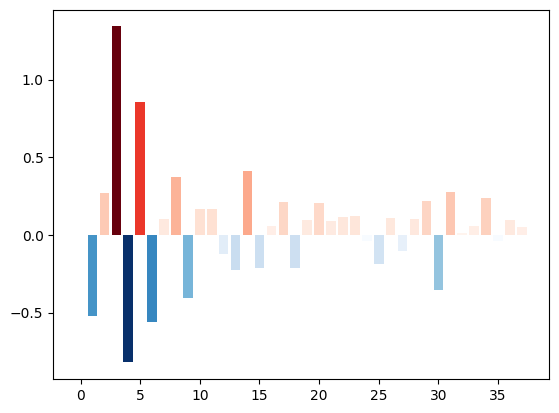

In [22]:
temp = Singapore_temp_filled['AverageTemperature']

average_values, num_period = calculateMovingAverage(temp, 5)


difference = calculateDifference(average_values)
plotDifference(difference)

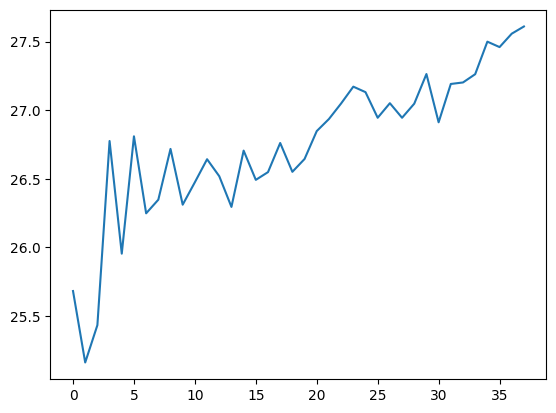

In [24]:
plt.plot(range(len(average_values)), average_values)

In [ ]:
half_decades = [(1825 + i*5, 1825+(i+1)*5) for i in range(num_period+1)]

pandas_difference = pd.DataFrame({'Half_decade': half_decades[1:], 'Difference': difference[1:], 'Average_temp': average_values[1:]})
pandas_difference.to_csv('Dataset/difference_singapore_temp.csv')
